# Python_Titanic_Tutorial
##Jeffrey Hoeber
###3/25/2016

### This tutorial uses Python to create predictive models for the Titanic competition presented by Kaggle: https://www.kaggle.com/c/titanic.
### We will go through the following steps in this tutorial:
####    1. Load and Separte the Titanic Dataset
####    2. Locate and fill Missing Values in Titanic Dataset
####    3. Utilize Logistic Regression to develop a Predictive Model
####    4. Utilize Classification Trees to develop a Predictive Model
####    5. Utilize Random Forest to develop a Predictive Model

#1. Loading and Separating the Titanic Dataset

###Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


###Read in full Titanic Data File from 'titanic_full.csv' and assign to data frame called 'titanic'

In [4]:
titanic = pd.read_csv('../To The Net/titanic_full.csv')

###Review summary of data columns and data types of each column within our titanic dataframe

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
pclass       1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 153.4+ KB


###Get a statistical  summary of each data column (where the column does not have NAN values)

In [6]:
titanic.describe()

,survived,age,sibsp,parch,pclass,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,0.381971,29.881135,0.498854,0.385027,2.294882,33.295479,160.809917
std,0.486055,14.413500,1.041658,0.865560,0.837836,51.758668,97.696922
min,0.000000,0.166700,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,21.000000,0.000000,0.000000,2.000000,7.895800,72.000000
50%,0.000000,28.000000,0.000000,0.000000,3.000000,14.454200,155.000000
75%,1.000000,39.000000,1.000000,0.000000,3.000000,31.275000,256.000000
max,1.000000,80.000000,8.000000,9.000000,3.000000,512.329200,328.000000


####Calculate what percent of the data that is NA or blank

In [7]:
titanic.isnull().sum()/titanic.shape[0]

survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
pclass       0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

####Calculate what percent of the data that is not NA or blank

In [8]:
titanic.count()/titanic.shape[0]

survived     1.000000
name         1.000000
sex          1.000000
age          0.799083
sibsp        1.000000
parch        1.000000
pclass       1.000000
ticket       1.000000
fare         0.999236
cabin        0.225363
embarked     0.998472
boat         0.371276
body         0.092437
home.dest    0.569137
dtype: float64

####Create 'gender' column that is the binary version of the 'sex' column

In [9]:
titanic['gender'] = titanic.sex.map({'female':0, 'male':1}).astype(int)

##Plot bar graph of Survival by Gender

####Utilize groupby function in order to group dataset by sex and survived column

In [10]:
titanic_plot = titanic.groupby(['sex', 'survived'])['sex'].count().unstack('survived')

### Create a stacked bar graph utilizing Matplotlib library

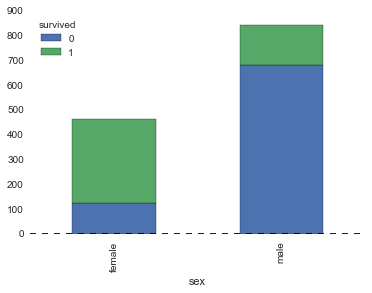

In [11]:
titanic_plot.plot(kind='bar', stacked=True)

###Create a (count) bar graph using Seaborn Library

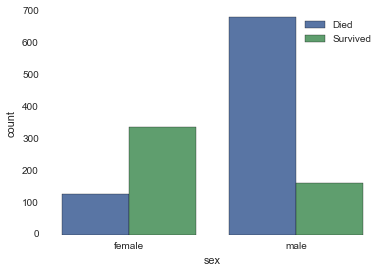

In [12]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.legend(['Died','Survived'])

##Create a histogram graph using Seaborn Library

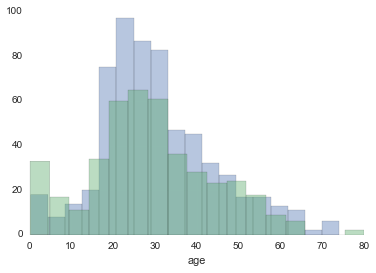

In [13]:
sns.distplot(titanic[titanic.survived==0].age.dropna(), hist=True, kde=False)
sns.distplot(titanic[titanic.survived==1].age.dropna(), hist=True, kde=False)

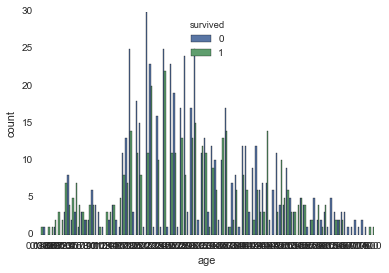

In [14]:
sns.countplot(x='age', hue='survived', data=titanic)

#2. Dealing with Missing Values

###Before we begin building predictive models, we should fill in the missing values. If we do not fill in the missing values, this may result in skewed results (such as samples being removed as a result of 1 variable being null)

In [15]:
# Create a column called 'age2' that is a duplicate of 'age' column. New column will be used to hold new values.
titanic['age2'] = titanic.age

In [16]:
#for any female without an age, set the age to the median female age
titanic.age2[(titanic.age2.isnull()) & (titanic.sex=='female')] = titanic['age'][titanic.sex == 'female'].median()

C:\Users\jhoeber002\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [17]:
#for any male  without an age, set the age to the median male age
titanic.age2[(titanic.age2.isnull()) & (titanic.sex=='male')] = titanic['age'][titanic.sex == 'male'].median()

C:\Users\jhoeber002\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [18]:
titanic['fare2'] = titanic.fare

In [19]:
#set any empty fares to the median fare
titanic.fare2[titanic.fare2.isnull()] = titanic.fare.median()

C:\Users\jhoeber002\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [20]:
titanic['embarked2'] = titanic.embarked

In [21]:
#set any samples with embarked = null, to 'C'
titanic.embarked2[titanic.embarked.isnull()] = 'C'

C:\Users\jhoeber002\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [22]:
#translate embarked column to numeric numbers
titanic['embarked3'] = titanic.embarked2.map({'S':1, 'C':2, 'Q':3}).astype(int)

##Correlation between Titanic Dataset variables

In [23]:
titanic[['survived', 'sex', 'age2', 'sibsp', 'parch', 'pclass', 'fare2']].corr()

,survived,age2,sibsp,parch,pclass,fare2
survived,1.000000,-0.045882,-0.027825,0.082660,-0.312469,0.244414
age2,-0.045882,1.000000,-0.191321,-0.126307,-0.379761,0.178728
sibsp,-0.027825,-0.191321,1.000000,0.373587,0.060832,0.160349
parch,0.082660,-0.126307,0.373587,1.000000,0.018322,0.221635
pclass,-0.312469,-0.379761,0.060832,0.018322,1.000000,-0.558683
fare2,0.244414,0.178728,0.160349,0.221635,-0.558683,1.000000


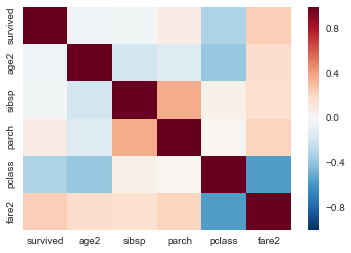

In [24]:
sns.heatmap(titanic[['survived', 'sex', 'age2', 'sibsp', 'parch', 'pclass', 'fare2']].corr())

#3. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()

In [27]:
#select feature columns (independent variables)
feature_cols = ['gender']
X = titanic[feature_cols]
#dependent variable
y = titanic['survived']
#split dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [28]:
#fit training data to a Logistic Regression Model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [29]:
#returns mean accuracy of Logistic Regression Model on test dataset
logreg.score(X_test, y_test)

0.79134860050890588

##Confusion Matrix

In [30]:
from pandas_confusion import ConfusionMatrix

In [31]:
from sklearn.metrics import f1_score, confusion_matrix

In [32]:
confusion_matrix(y_test, logreg.predict(X_test))

array([[193,  46],
       [ 36, 118]])

In [33]:
y_pred = logreg.predict(X_test)

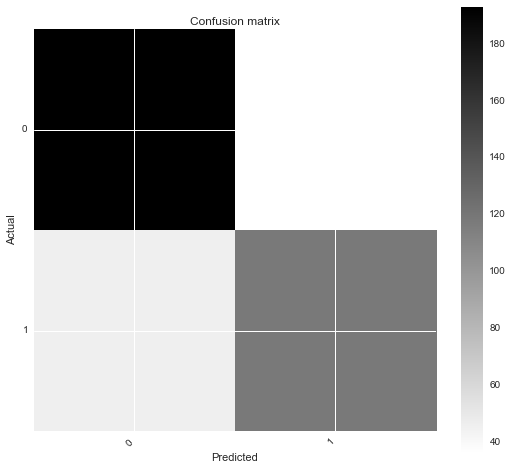

In [34]:
cm = ConfusionMatrix(y_pred, y_test)
cm.plot(grid=True)

##Logistic Regression with More Variables

In [35]:
#create a function log_reg that will return a Logistic Regression Model and Consfusion Matrix based on the features (or independent variables) passed to it
def log_reg(titanic_data, feature_cols):
    lr = LogisticRegression()
    X = titanic_data[feature_cols]
    y = titanic_data['survived']
    X_train, X_test, y_train, y_trest = train_test_split(X, y, test_size = .3)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print confusion_matrix(y_test, y_pred)
    cm = ConfusionMatrix(y_pred, y_test)
    cm.plot(grid=True)

[[152  87]
 [ 91  63]]


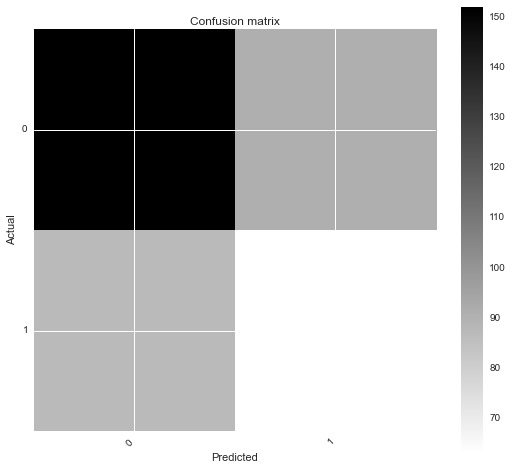

In [36]:
features = ['gender', 'pclass', 'age2']
lr = log_reg(titanic, features)

[[158  81]
 [ 99  55]]


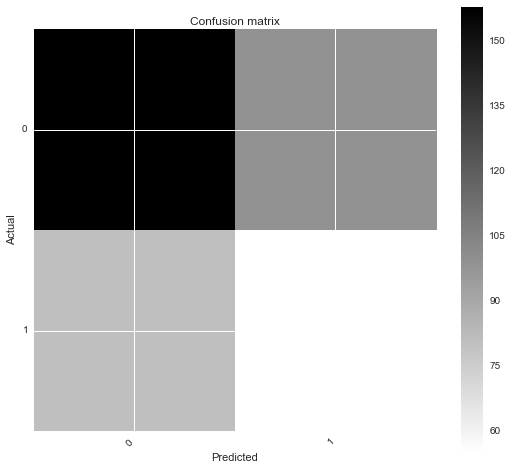

In [37]:
features = ['gender', 'pclass', 'age2', 'embarked3']
lr = log_reg(titanic, features)

[[158  81]
 [ 91  63]]


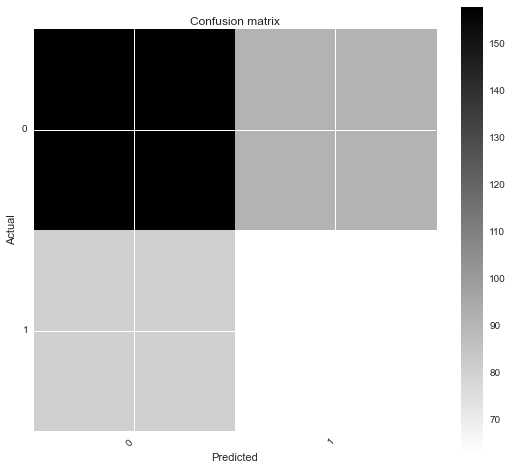

In [38]:
features = ['gender', 'pclass', 'age2', 'fare2']
lr = log_reg(titanic, features)

#2. Classification Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [40]:
treeclass = DecisionTreeClassifier(random_state=1)
treeclass

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')

In [41]:
#determine independent variables/features
feature_cols = ['gender', 'pclass', 'age2', 'embarked3']
X = titanic[feature_cols]
#set dependent variable
y = titanic['survived']
#create training and testing data for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [42]:
#calculate the RMSE
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treeclass, X_train, y_train, cv=14, scoring = 'mean_squared_error')
np.mean(np.sqrt(-scores))

0.46414789872566464

In [43]:
#determine which depth produces the lowest RMSE for the model
max_depth_range = range(1,8)
RMSE_scores = []
for depth in max_depth_range:
    treeclass = DecisionTreeClassifier(max_depth=depth, random_state = 1)
    MSE_scores = cross_val_score(treeclass, X_train, y_train, cv=14, scoring = 'mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [44]:
sorted(zip(RMSE_scores, max_depth_range))[0]

(0.42865323814110351, 4)

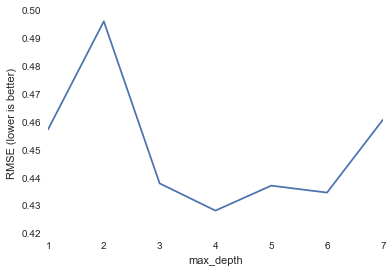

In [45]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [46]:
# Create a Descision Tree model using a max_depth of 3 as a result of having a low RMSE
treeclass = DecisionTreeClassifier(max_depth = 3, random_state=1)
treeclass.fit(X_train,y_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1, splitter='best')

In [47]:
# Determine the importance of each of the features
pd.DataFrame({'feature': feature_cols, 'importance': treeclass.feature_importances_})

,feature,importance
0,gender,0.687376
1,pclass,0.233713
2,age2,0.051540
3,embarked3,0.027371


In [48]:
# Calulate predictoins of test dataset (or whether survived/died) based on Tree Regression model created.
y_pred = treeclass.predict(X_test)

[[226  63]
 [ 16  88]]


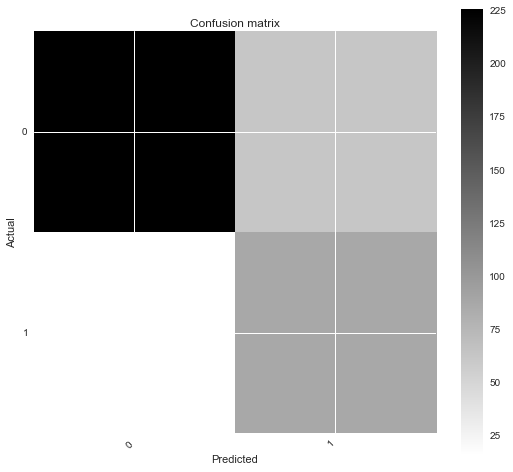

In [49]:
# print confusion_matrix(y_pred, y_test)
print confusion_matrix(y_pred, y_test)
cm = ConfusionMatrix(y_pred, y_test)
cm.plot(grid=True)

In [50]:
# Calculate the RMSE utilizing the actual data from our test set against our predictions for our test set
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.44835009948123644

##Plot the Decision Tree Model we created into a PDF file

In [51]:
from sklearn.externals.six import StringIO
import pydot
from sklearn import tree

###In order to run the below code, you may receive an error and need to edit the function find_graphviz() within the pydot.py file so that every line within the function is commented out. Then add in "return {'dot': 'C:\\Program Files (x86)\\Graphviz2.30\\bin\\dot.exe'}"or the location of your dot.exe file

In [54]:
dot_data = StringIO() 
tree.export_graphviz(treeclass, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree.pdf") 

True

<img src="files/tree.pdf">

#3. Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf = RandomForestClassifier()

In [102]:
rf

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

##Tuning n_estimators

In [130]:
#values to try out for n_estimators
estimator_range = range (5, 100, 5)
RMSE_scores = []

In [132]:
#use 5-fold cross-validation with each value of n_estimators
for estimator in estimator_range:
    rfclass = RandomForestClassifier(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfclass, X_train, y_train, cv=5, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

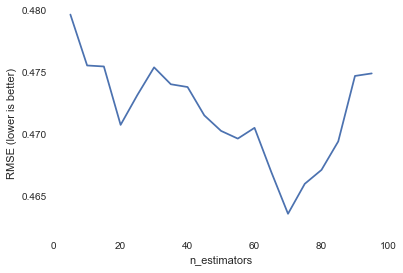

In [135]:
#plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [137]:
sorted(zip(RMSE_scores, estimator_range))[0]

(0.46369185515229905, 70)

##Tuning max_features

In [139]:
#list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)
RMSE_scores = []

In [140]:
#use 10-fold cross-validation with each value of max_features
for feature in feature_range:
    rfclass = RandomForestClassifier(n_estimators=70, max_features = feature, random_state=1)
    MSE_scores = cross_val_score(rfclass, X_train, y_train, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [1]:
#plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

NameError: name 'plt' is not defined

In [143]:
sorted(zip(RMSE_scores, feature_range))[0]

(0.47908481197516917, 1)

##Fitting a Random Forest with the best parameters

In [148]:
# fit training data t oa RandomForest Model
rf = RandomForestClassifier(n_estimators = 70, max_features = 4, oob_score=True, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features=4,
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=70, n_jobs=1, oob_score=True,
            random_state=1, verbose=0)

In [149]:
# Determine the importance of each of the features
pd.DataFrame({'feature': feature_cols, 'importance': rf.feature_importances_})

,feature,importance
0,gender,0.372559
1,pclass,0.166765
2,age2,0.393499
3,embarked3,0.067178


In [150]:
rf.feature_importances_

array([ 0.37255877,  0.16676513,  0.39349851,  0.06717759])

In [153]:
#compute the out-of-bag R-squared score
rf.oob_score_

0.76746724890829698

In [154]:
#use Random Forest model to predict dependent variable on test dataset
y_pred2 = rf.predict(X_test)

[[210  51]
 [ 25 107]]


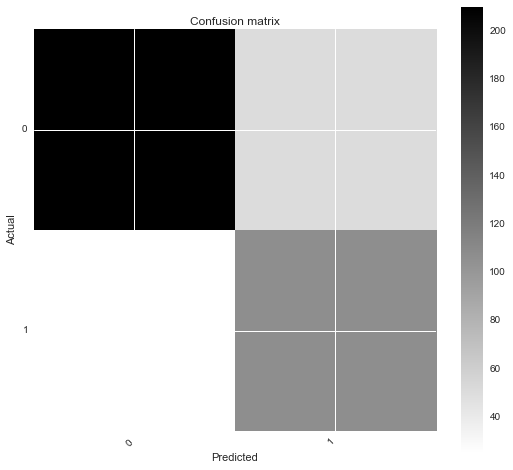

In [155]:
# print confusion_matrix(y_pred, y_test)
print confusion_matrix(y_pred2, y_test)
cm = ConfusionMatrix(y_pred2, y_test)
cm.plot(grid=True)